In [28]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

### Define parameters

In [29]:
n_files = 6
sample_period=1/20

In [30]:
gain_list=[[1,0,0],
           [2,0,0],
           [3,0,0],
           [3,0,0.01],
           [3,0,0.05],
           [3,0,0.1]]

In [ ]:
ang_gain_list=[[4,0,0],
               [8,0,0],
               [15,0,0],
               [15,0,1],
               [15,0,5],
               [15,0,3],]

### Distance Tuning Effort

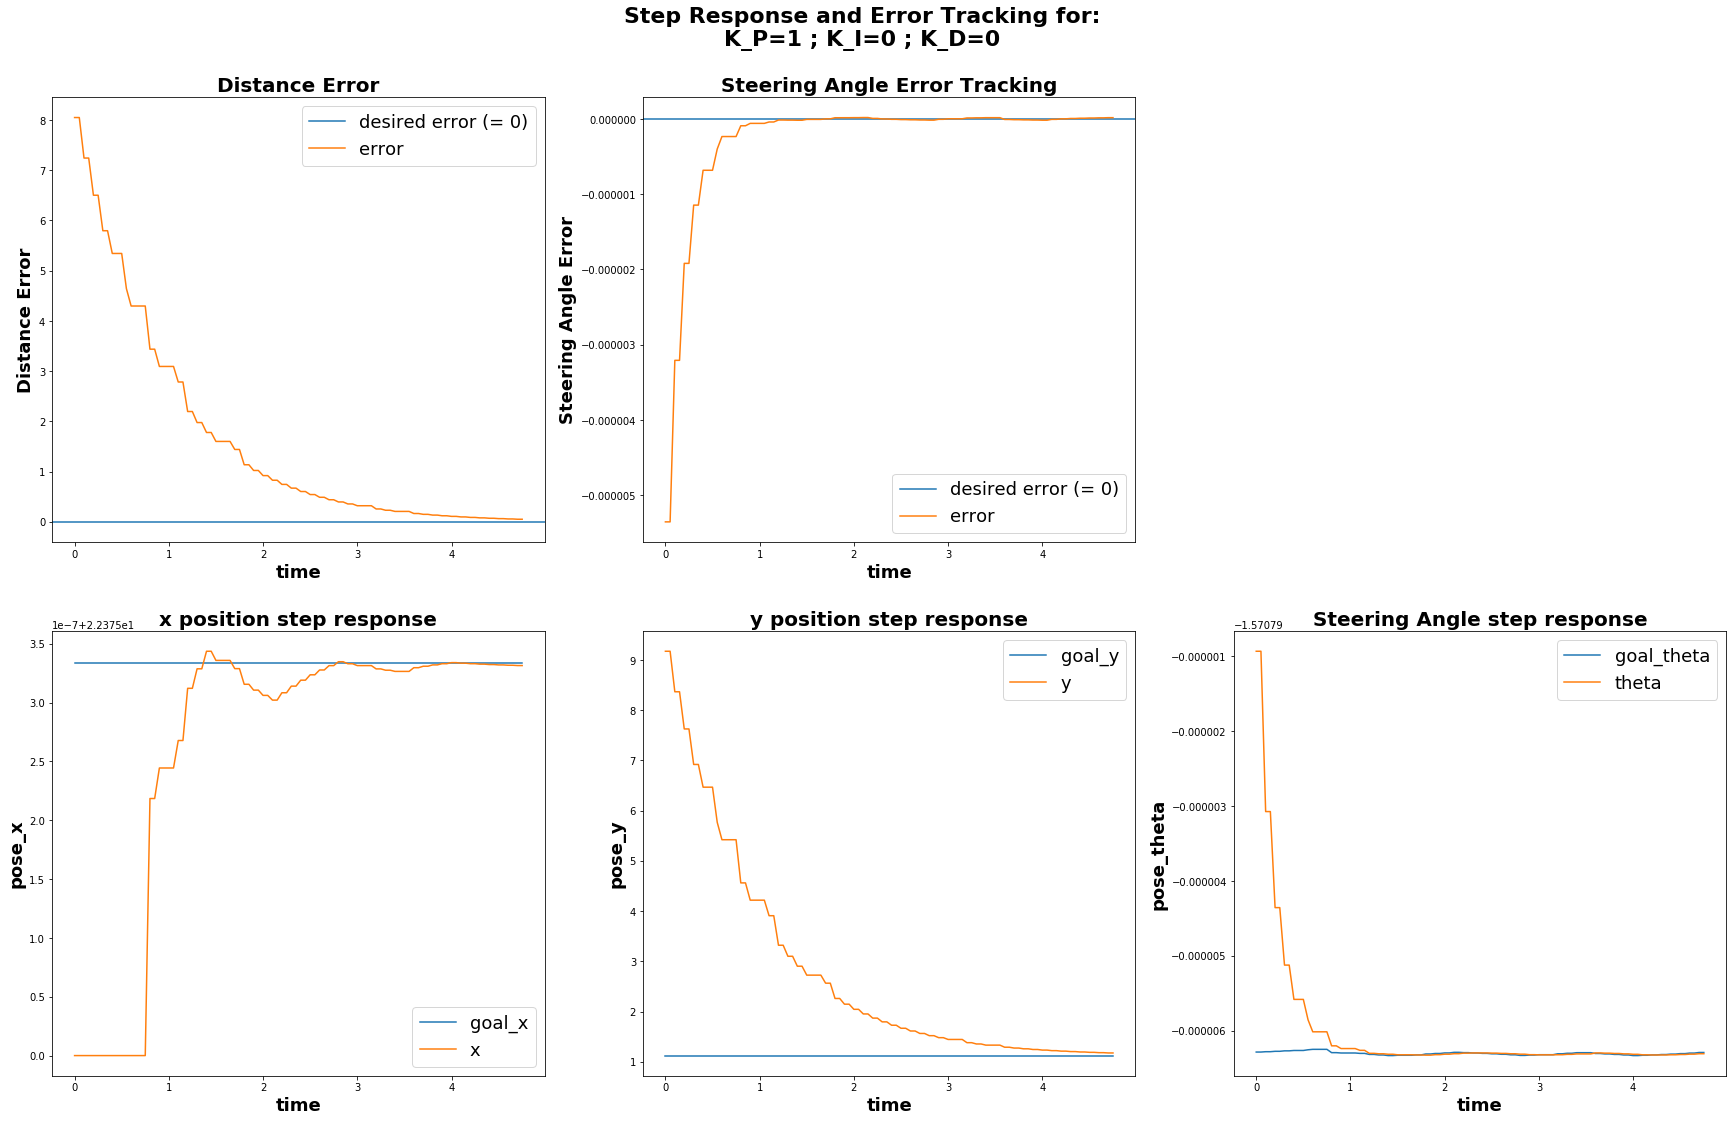

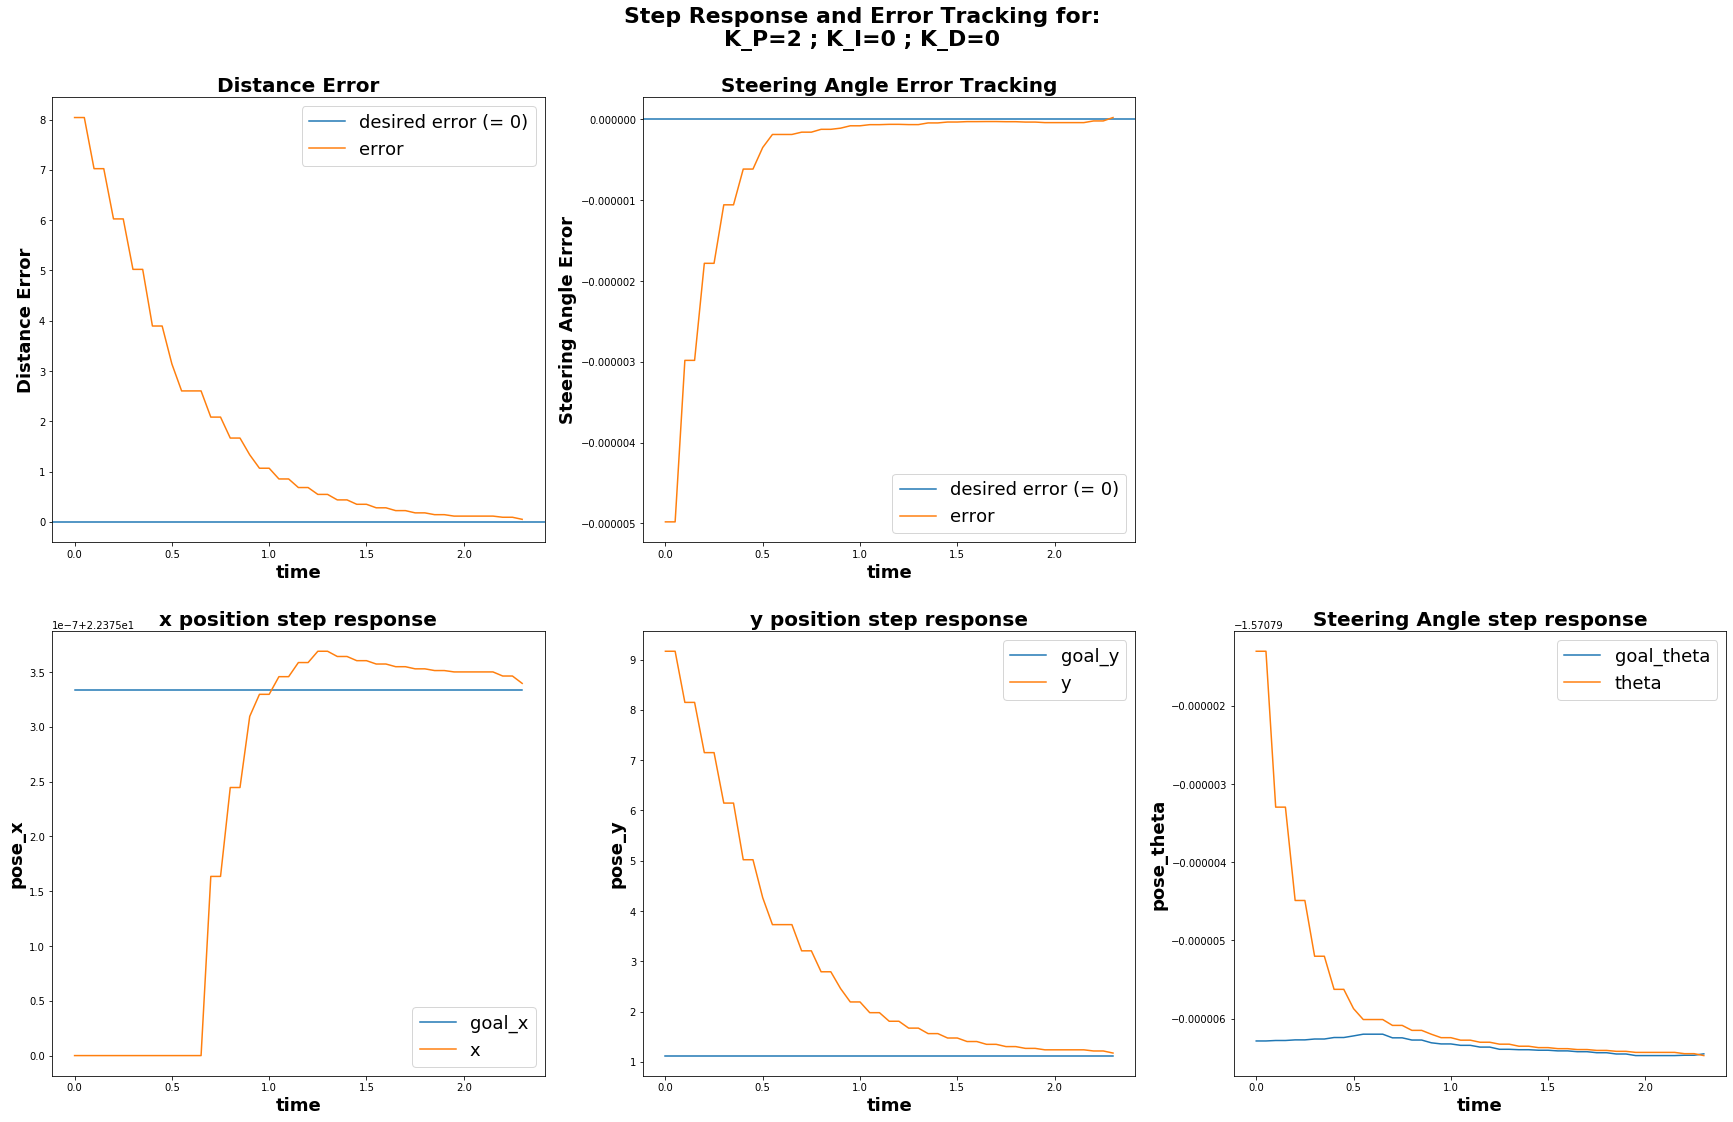

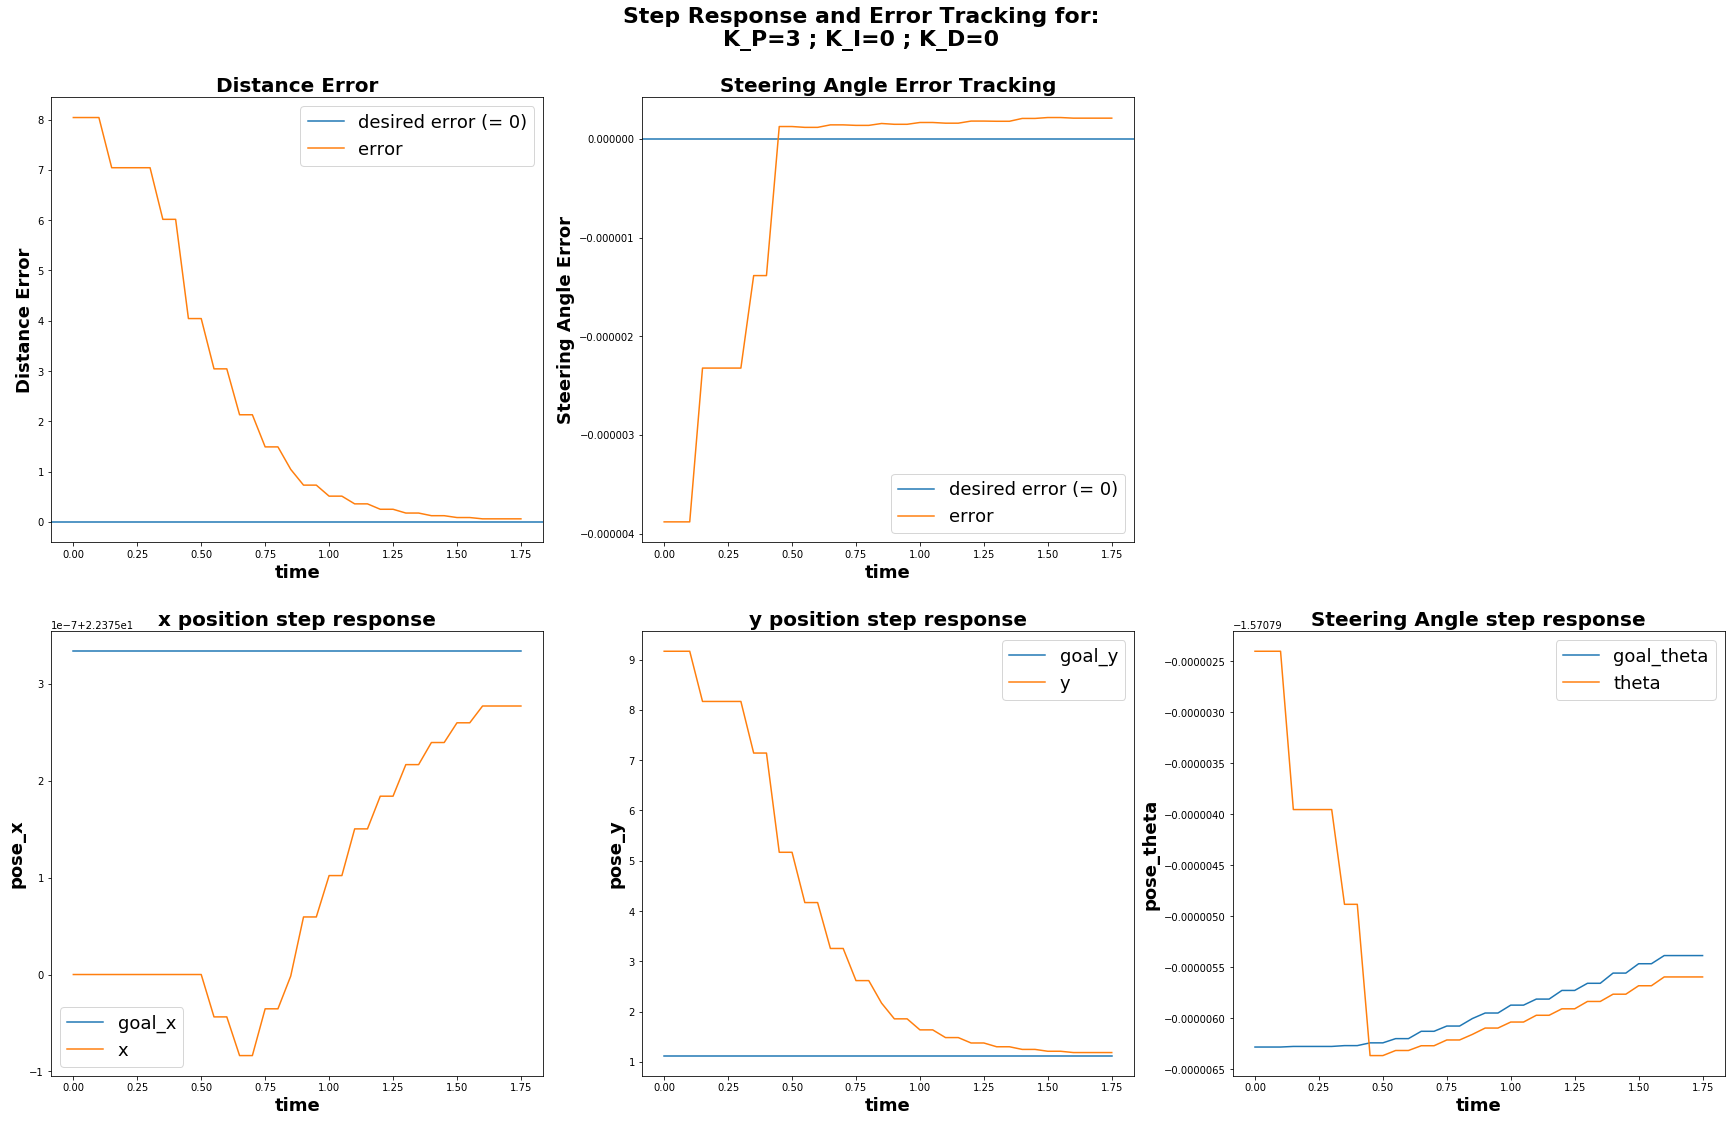

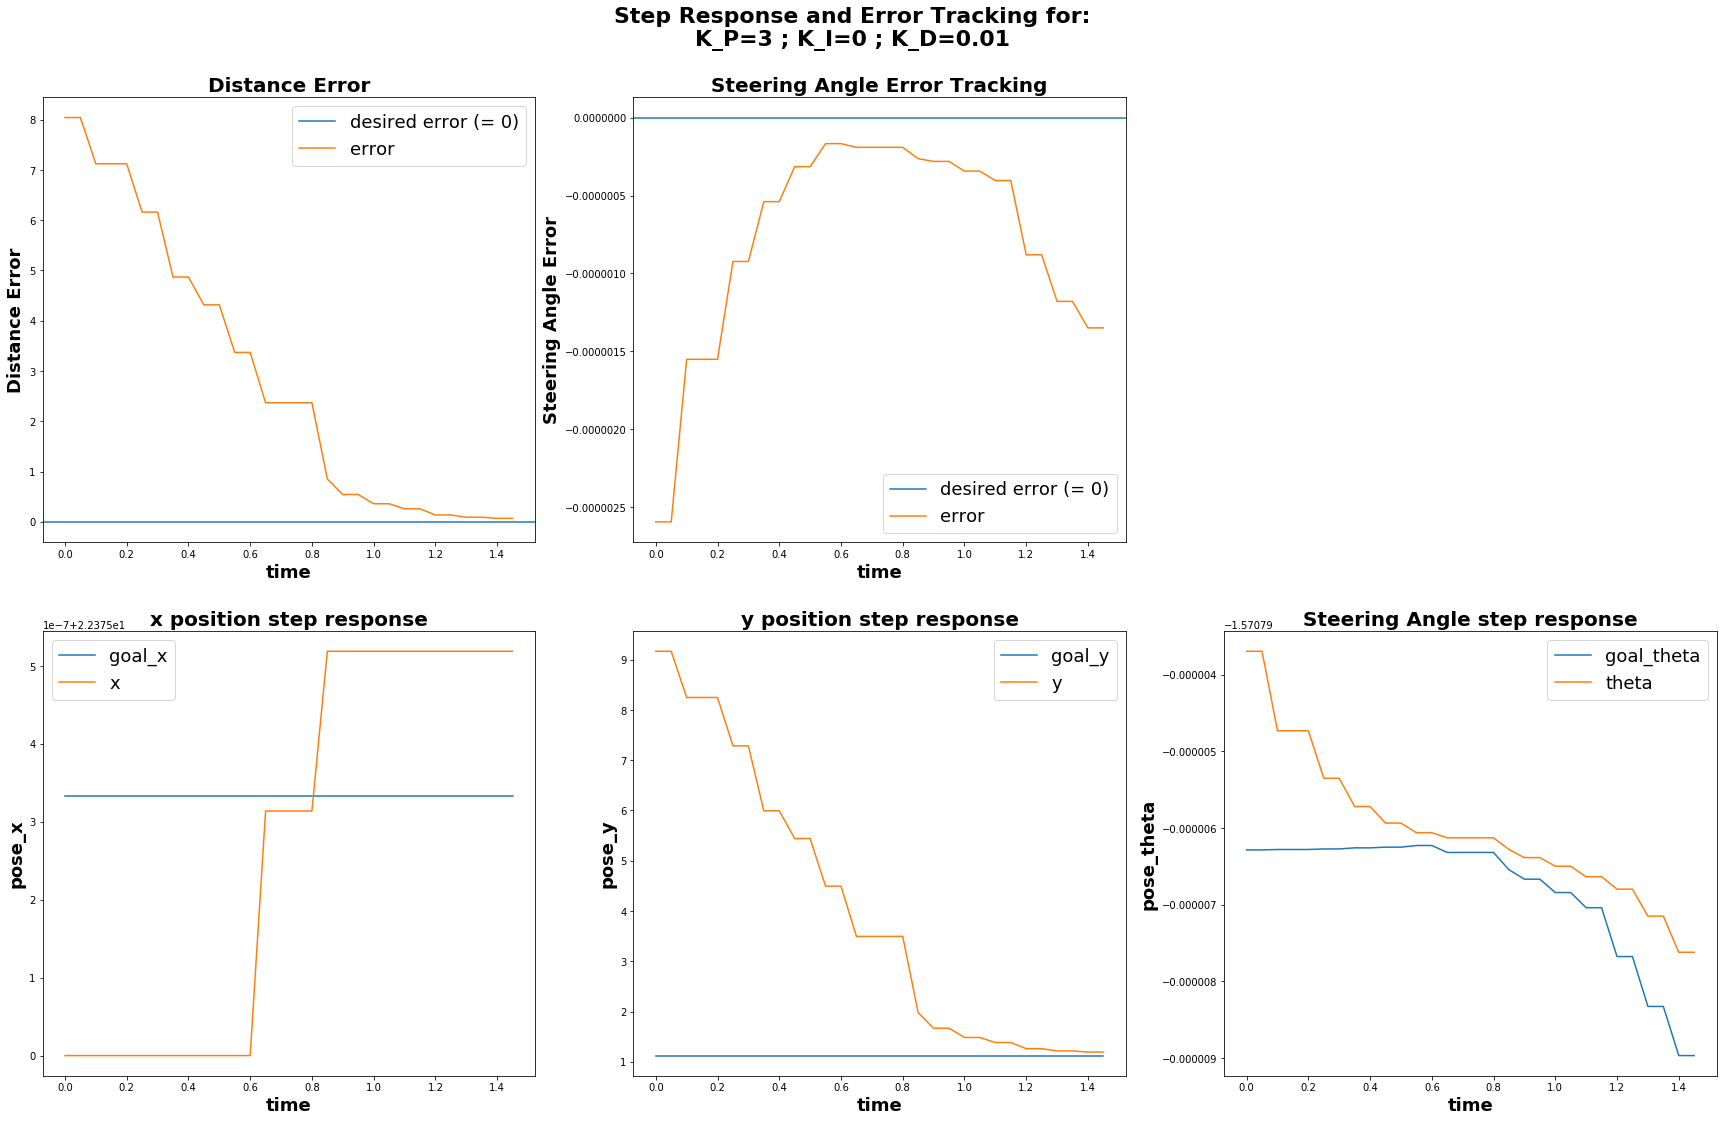

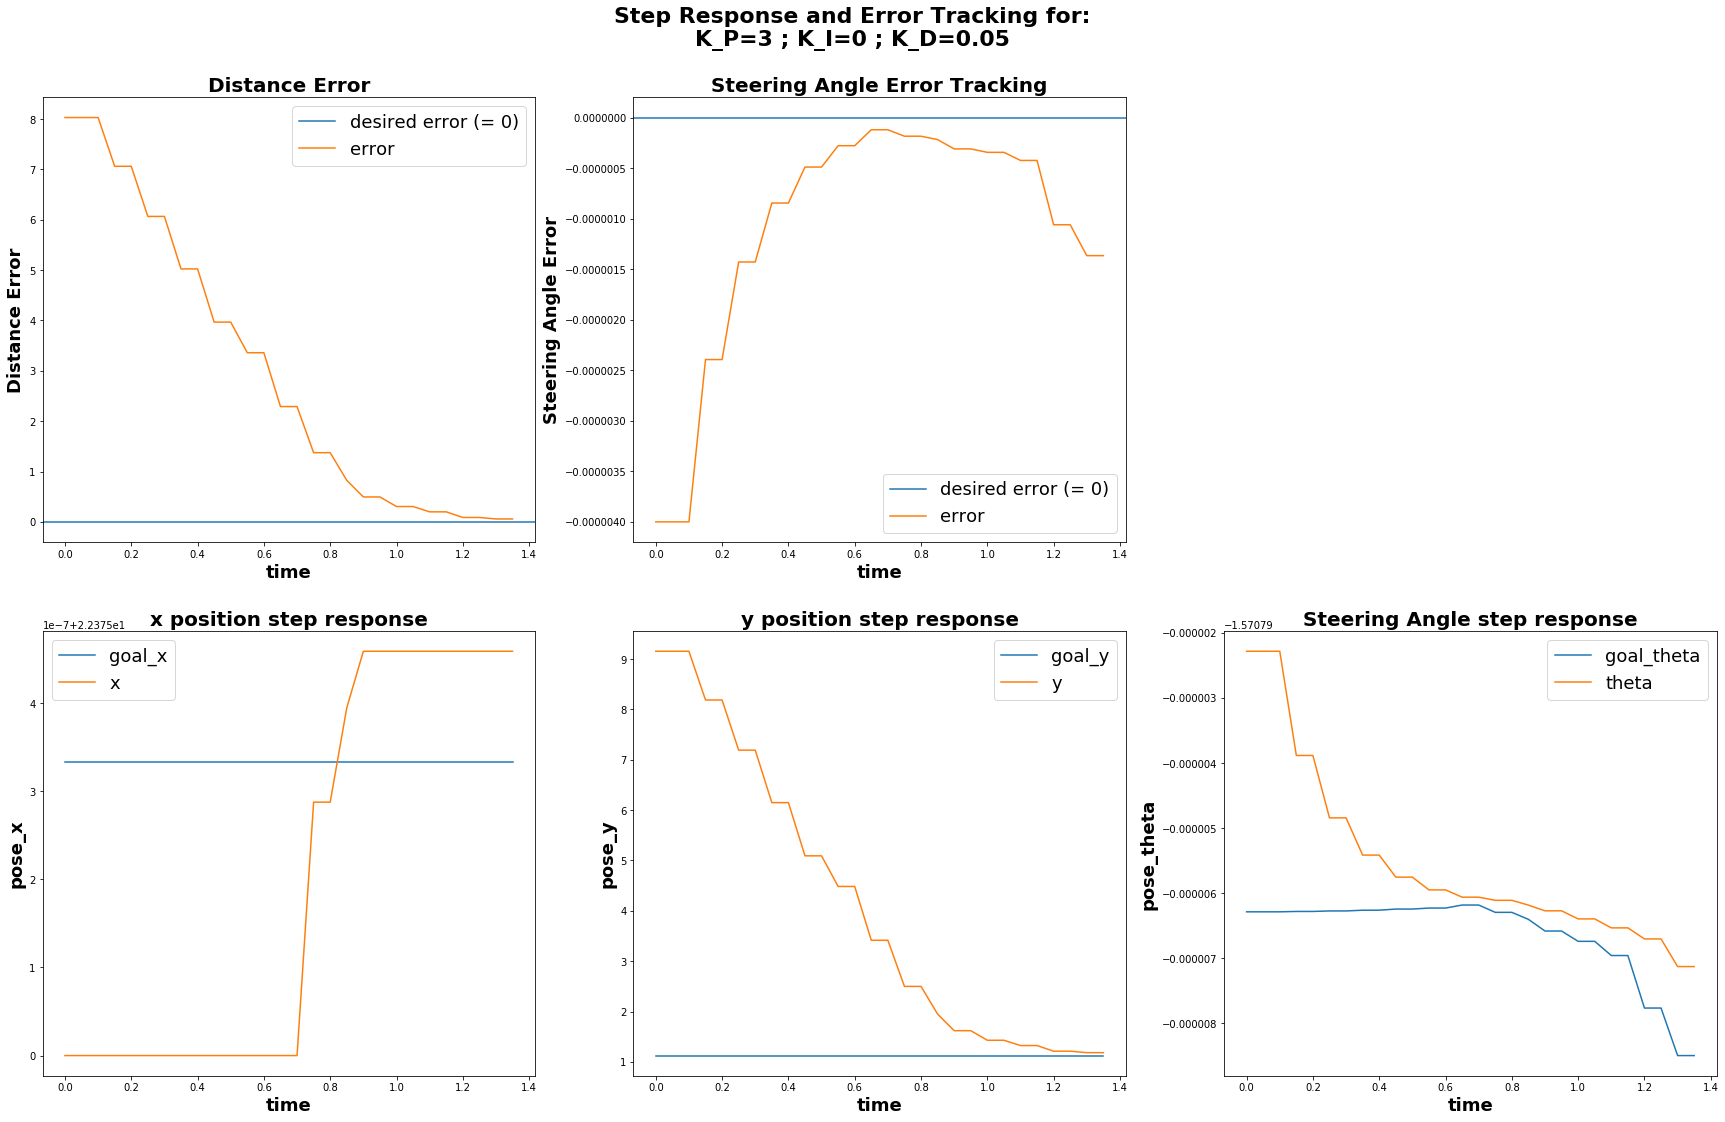

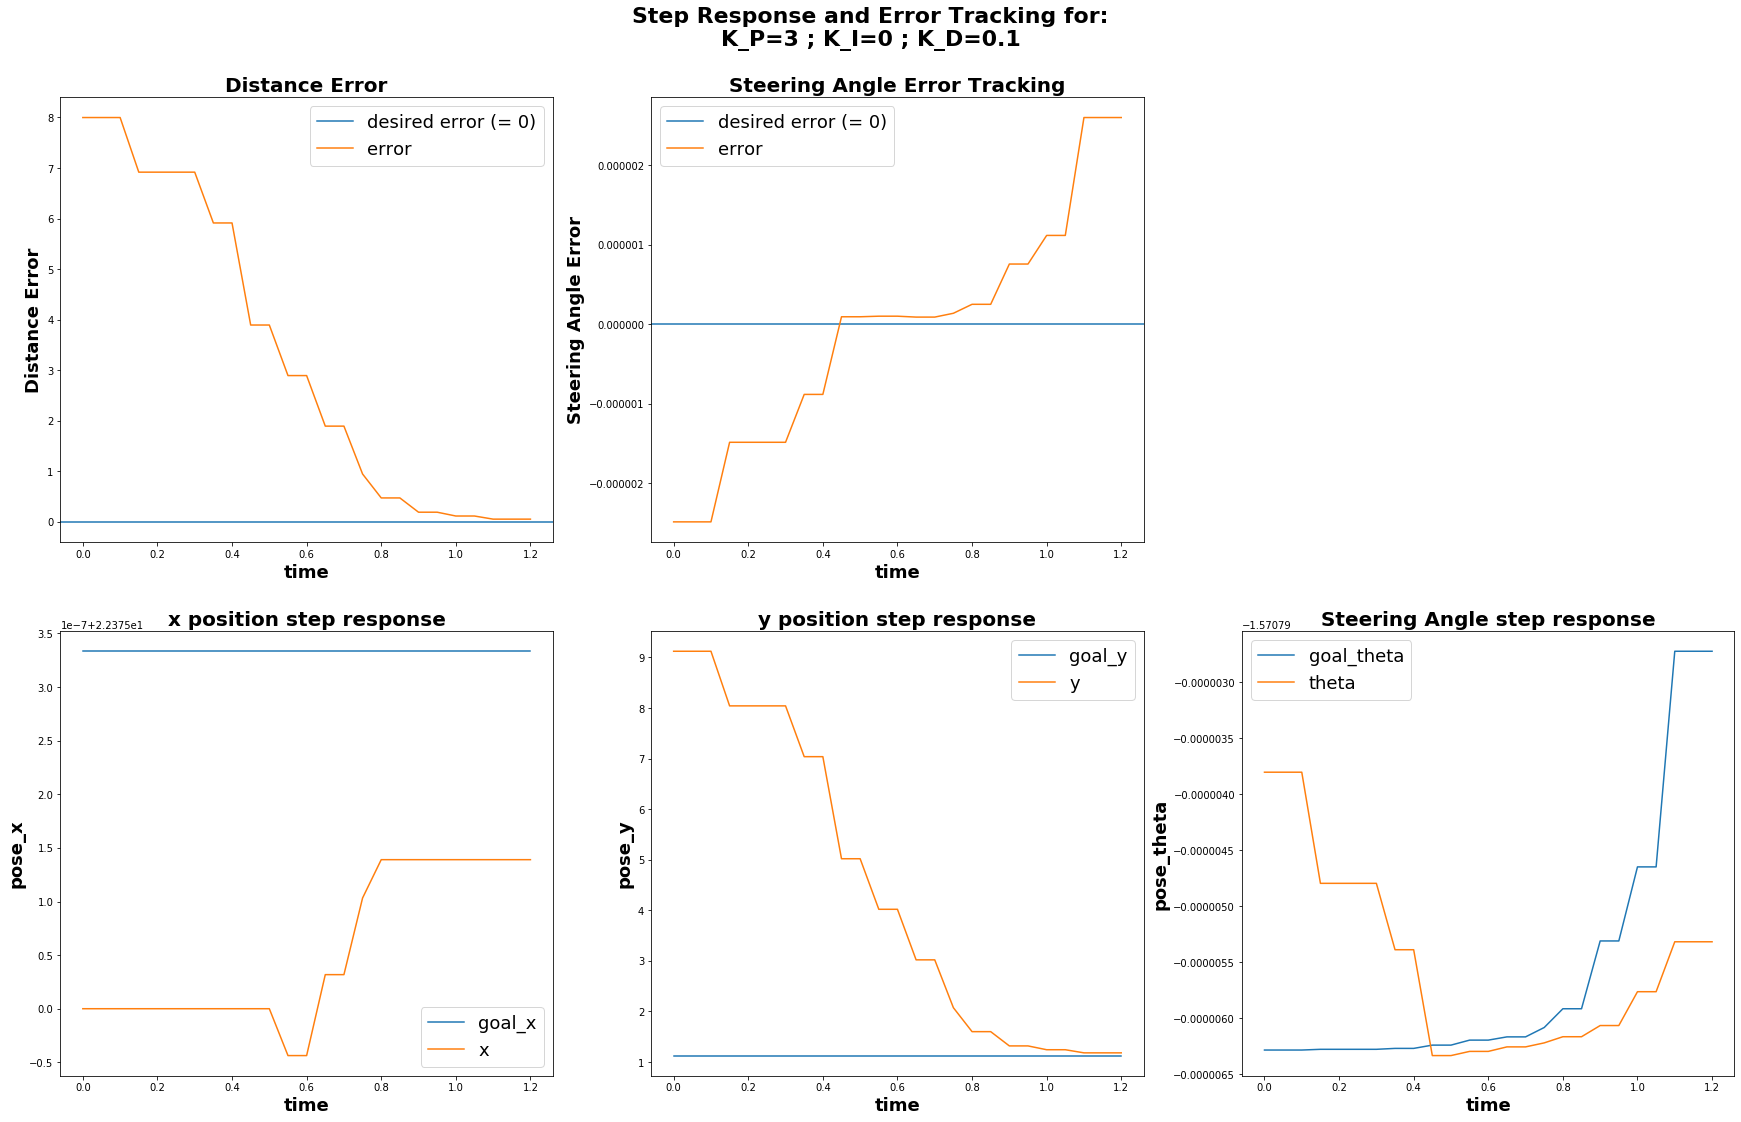

In [31]:
for i in range(n_files):
    data=pd.read_csv('log_data_{}.csv'.format(i+1))
    t=np.arange(data.shape[0])*sample_period
    fig, axes = plt.subplots(2, 3, figsize=(30,18))
    fig.suptitle('Step Response and Error Tracking for Distance with:\nK_P={} ; K_I={} ; K_D={}'.format(*gain_list[i]),
                 fontsize=22,fontweight='bold',y=0.95)
    axes[0][0].axhline(y=0, xmin=0,label='desired error (= 0)')
    axes[0][0].plot(t, data['distance_error'],color='C1',label='error')
    axes[0][0].legend(fontsize=18)
    axes[0][0].set_xlabel('time',fontsize=18,fontweight='bold')
    axes[0][0].set_ylabel('Distance Error',fontsize=18,fontweight='bold')
    axes[0][0].set_title('Distance Error',fontsize=20,fontweight='bold')
  
    axes[0][1].axhline(y=0, xmin=0,label='desired error (= 0)')
    axes[0][1].plot(t, data['angle_error'],color='C1',label='error')
    axes[0][1].legend(fontsize=18)
    axes[0][1].set_xlabel('time',fontsize=18,fontweight='bold')
    axes[0][1].set_ylabel('Steering Angle Error',fontsize=18,fontweight='bold')
    axes[0][1].set_title('Steering Angle Error Tracking',fontsize=20,fontweight='bold')
    
    axes[0][-1].axis('off')

    axes[1][0].plot(t, data['goal_x'],label='goal_x')
    axes[1][0].plot(t, data['current_x'],label='x')
    axes[1][0].legend(fontsize=18)
    axes[1][0].set_xlabel('time',fontsize=18,fontweight='bold')
    axes[1][0].set_ylabel('pose_x',fontsize=18,fontweight='bold')
    axes[1][0].set_title('x position step response',fontsize=20,fontweight='bold')
  
    axes[1][1].plot(t, data['goal_y'],label='goal_y') 
    axes[1][1].plot(t, data['current_y'],label='y')
    axes[1][1].legend(fontsize=18)
    axes[1][1].set_xlabel('time',fontsize=18,fontweight='bold')
    axes[1][1].set_ylabel('pose_y',fontsize=18,fontweight='bold')
    axes[1][1].set_title('y position step response',fontsize=20,fontweight='bold')
 
    axes[1][2].plot(t, data['goal_theta'],label='goal_theta')
    axes[1][2].plot(t, data['theta'],label='theta')
    axes[1][2].legend(fontsize=18)
    axes[1][2].set_xlabel('time',fontsize=18,fontweight='bold')
    axes[1][2].set_ylabel('pose_theta',fontsize=18,fontweight='bold')
    axes[1][2].set_title('Steering Angle step response',fontsize=20,fontweight='bold')
    plt.savefig('../report/images/control_dist_{}_{}_{}'.format(*gain_list[i])+'.png')
    plt.show()

### Orientation Tuning Effort

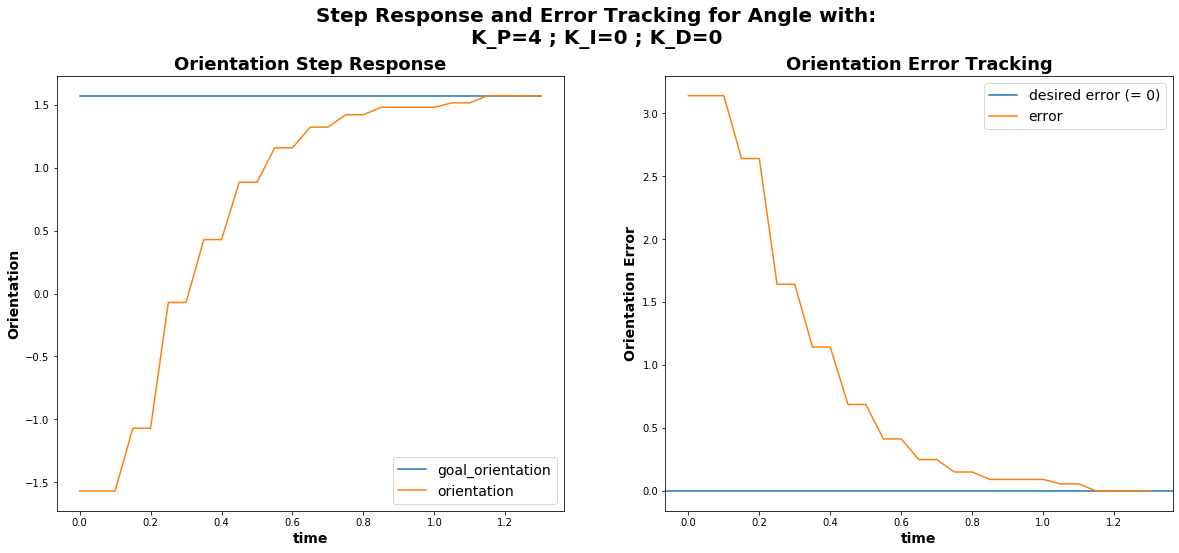

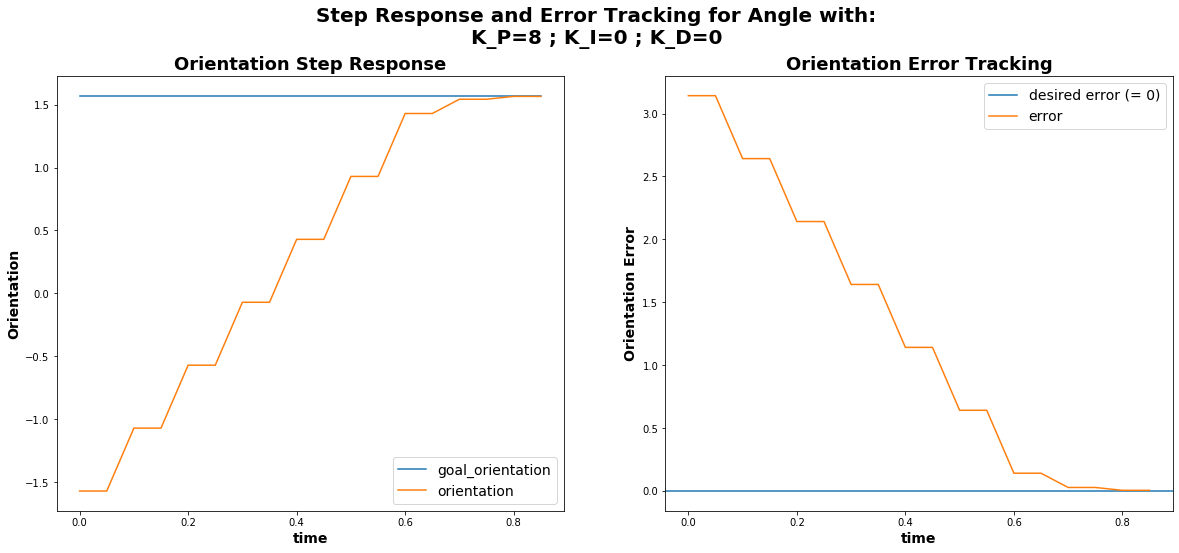

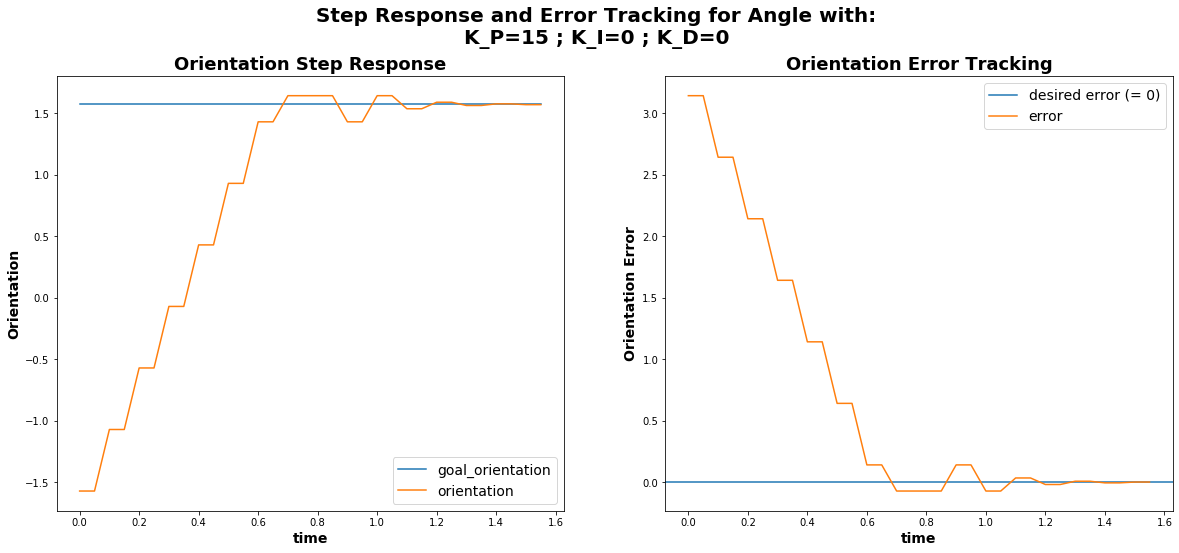

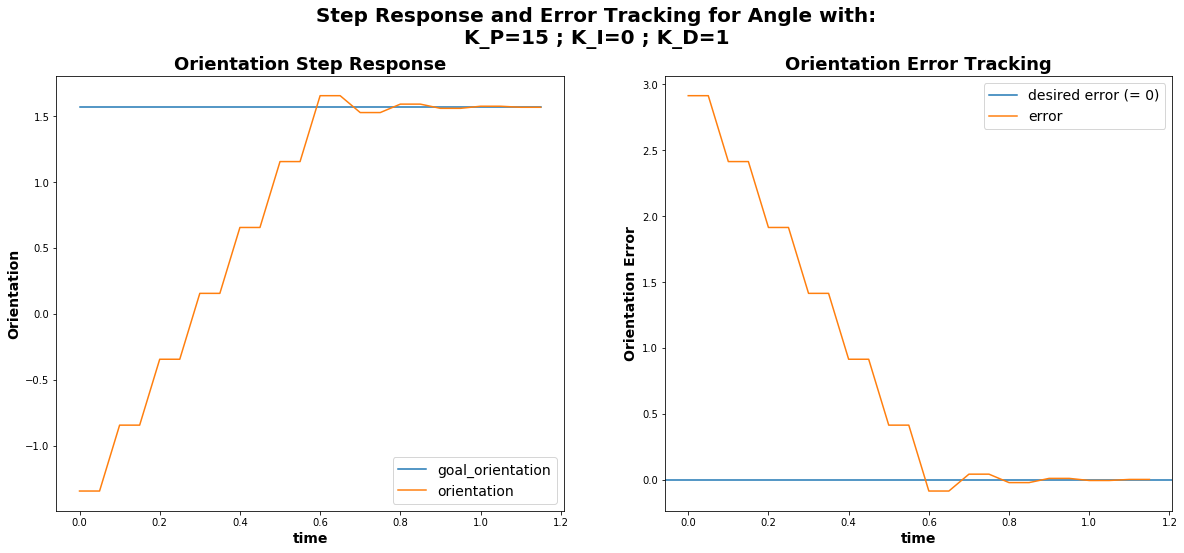

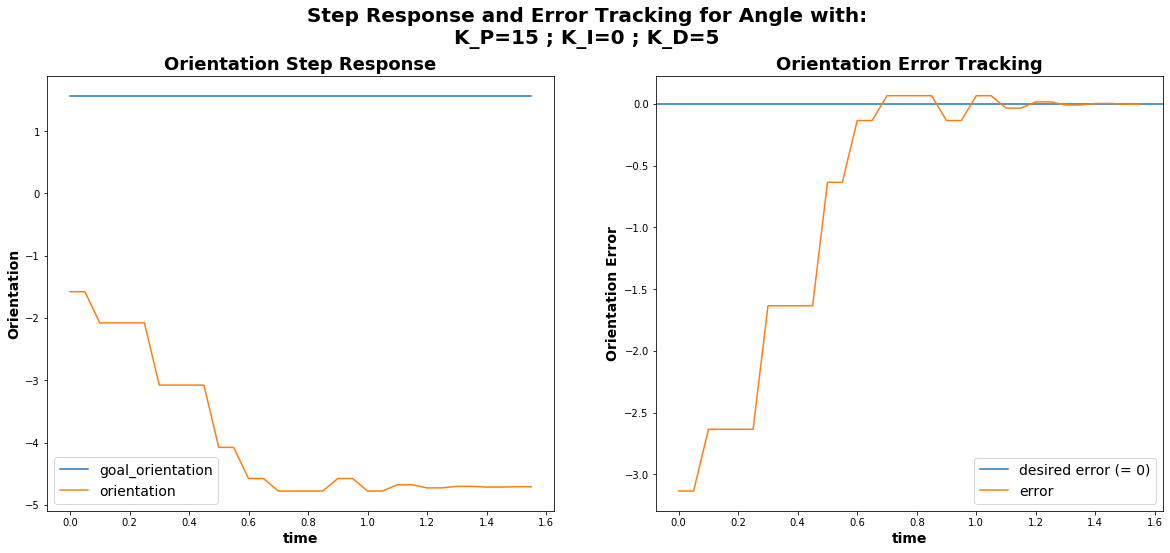

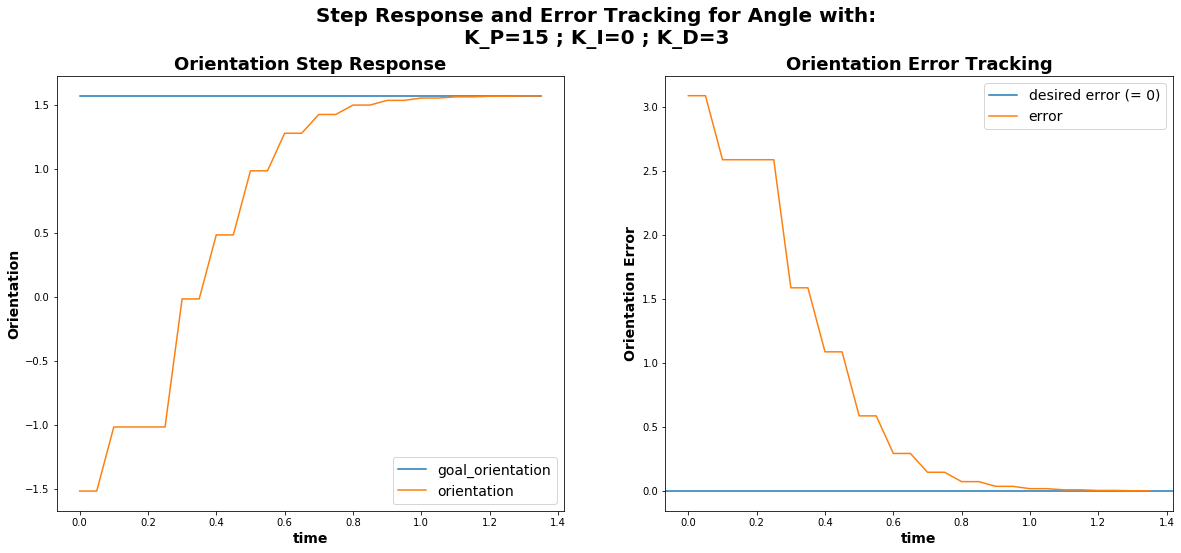

In [47]:
for i in range(n_files):
    data=pd.read_csv('ang_log_data_{}.csv'.format(i+1))
    t=np.arange(data.shape[0])*sample_period  
    
    fig, axes = plt.subplots(1, 2, figsize=(20,8))
    
    axes[0].plot(t, data['goal_orientation'],label='goal_orientation')
    axes[0].plot(t, data['theta'],label='orientation')
    axes[0].legend(fontsize=14)
    axes[0].set_xlabel('time',fontsize=14,fontweight='bold')
    axes[0].set_ylabel('Orientation',fontsize=14,fontweight='bold')
    axes[0].set_title('Orientation Step Response',fontsize=18,fontweight='bold')
  
    axes[1].axhline(y=0, xmin=0,label='desired error (= 0)')
    axes[1].plot(t, data['angle_error'],color='C1',label='error')
    axes[1].legend(fontsize=14)
    axes[1].set_xlabel('time',fontsize=14,fontweight='bold')
    axes[1].set_ylabel('Orientation Error',fontsize=14,fontweight='bold')
    axes[1].set_title('Orientation Error Tracking',fontsize=18,fontweight='bold')
    
    plt.suptitle('Step Response and Error Tracking for Angle with:\nK_P={} ; K_I={} ; K_D={}'.format(*ang_gain_list[i]),
                 fontsize=20,fontweight='bold',y=1)
    
    plt.savefig('../report/images/control_ang_{}_{}_{}'.format(*ang_gain_list[i])+'.png')
    plt.show()

### Comparing chosen gains with old proportional controller

In [53]:
dist_file={'chosen': gain_list.index([3,0,0.05])+1,'old':gain_list.index([1,0,0])+1}

angle_file={'chosen': ang_gain_list.index([4,0,0])+1,'old': 7}

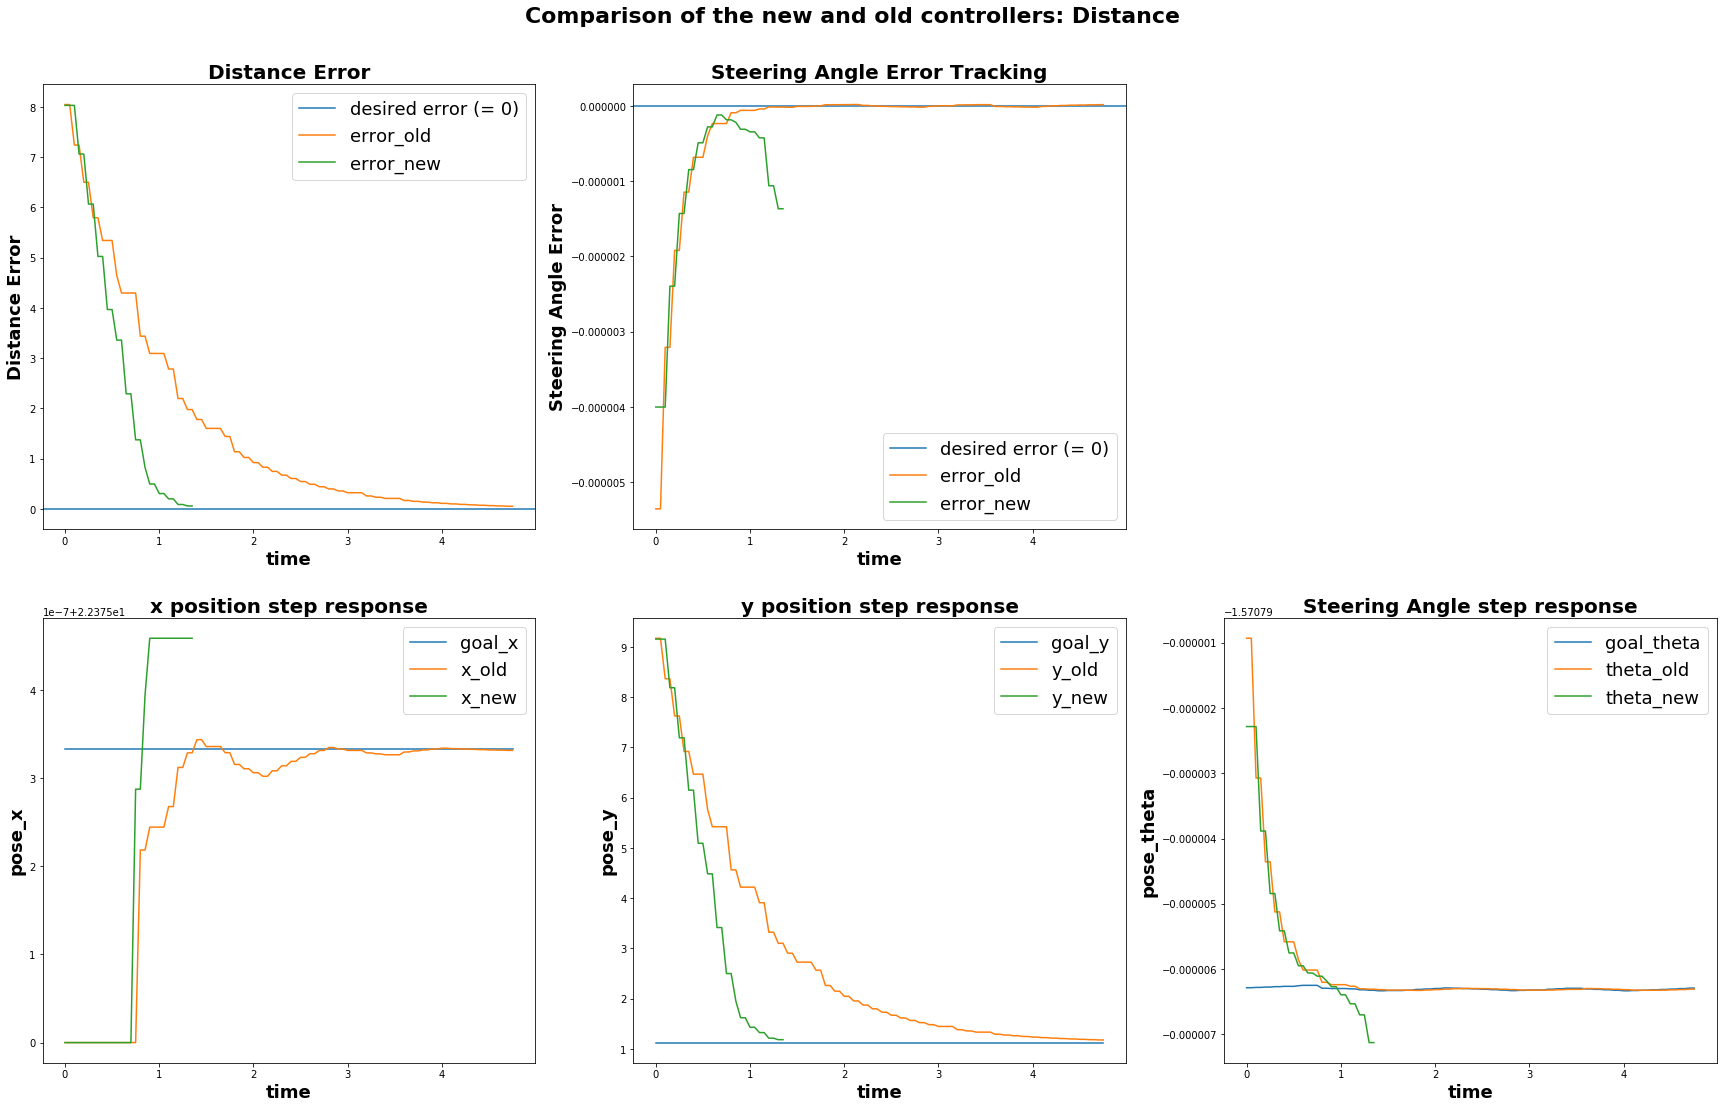

In [64]:
chosen_data=pd.read_csv('log_data_{}.csv'.format(dist_file['chosen']))
old_data=pd.read_csv('log_data_{}.csv'.format(dist_file['old']))

t1=np.arange(old_data.shape[0])*sample_period
t2=np.arange(chosen_data.shape[0])*sample_period
fig, axes = plt.subplots(2, 3, figsize=(30,18))
fig.suptitle('Comparison of the new and old controllers: Distance'.format(*gain_list[i]),
             fontsize=22,fontweight='bold',y=0.94)

axes[0][0].axhline(y=0, xmin=0,label='desired error (= 0)')
axes[0][0].plot(t1, old_data['distance_error'],color='C1',label='error_old')
axes[0][0].plot(t2, chosen_data['distance_error'],color='C2',label='error_new')
axes[0][0].legend(fontsize=18)
axes[0][0].set_xlabel('time',fontsize=18,fontweight='bold')
axes[0][0].set_ylabel('Distance Error',fontsize=18,fontweight='bold')
axes[0][0].set_title('Distance Error',fontsize=20,fontweight='bold')

axes[0][1].axhline(y=0, xmin=0,label='desired error (= 0)')
axes[0][1].plot(t1, old_data['angle_error'],color='C1',label='error_old')
axes[0][1].plot(t2, chosen_data['angle_error'],color='C2',label='error_new')
axes[0][1].legend(fontsize=18)
axes[0][1].set_xlabel('time',fontsize=18,fontweight='bold')
axes[0][1].set_ylabel('Steering Angle Error',fontsize=18,fontweight='bold')
axes[0][1].set_title('Steering Angle Error Tracking',fontsize=20,fontweight='bold')

axes[0][-1].axis('off')

axes[1][0].plot(t1, old_data['goal_x'],label='goal_x')
axes[1][0].plot(t1, old_data['current_x'],label='x_old')
axes[1][0].plot(t2, chosen_data['current_x'],label='x_new')
axes[1][0].legend(fontsize=18)
axes[1][0].set_xlabel('time',fontsize=18,fontweight='bold')
axes[1][0].set_ylabel('pose_x',fontsize=18,fontweight='bold')
axes[1][0].set_title('x position step response',fontsize=20,fontweight='bold')

axes[1][1].plot(t1, old_data['goal_y'],label='goal_y')
axes[1][1].plot(t1, old_data['current_y'],label='y_old')
axes[1][1].plot(t2, chosen_data['current_y'],label='y_new')
axes[1][1].legend(fontsize=18)
axes[1][1].set_xlabel('time',fontsize=18,fontweight='bold')
axes[1][1].set_ylabel('pose_y',fontsize=18,fontweight='bold')
axes[1][1].set_title('y position step response',fontsize=20,fontweight='bold')

axes[1][2].plot(t1, old_data['goal_theta'],label='goal_theta')
axes[1][2].plot(t1, old_data['theta'],label='theta_old')
axes[1][2].plot(t2, chosen_data['theta'],label='theta_new')
axes[1][2].legend(fontsize=18)
axes[1][2].set_xlabel('time',fontsize=18,fontweight='bold')
axes[1][2].set_ylabel('pose_theta',fontsize=18,fontweight='bold')
axes[1][2].set_title('Steering Angle step response',fontsize=20,fontweight='bold')
plt.savefig('../report/images/compare_dist_{}_{}_{}'.format(*gain_list[i])+'.png')
plt.show()